In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [19]:
loan_df = pd.read_csv('dataset.csv')
loan_df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [7]:
loan_df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [8]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [9]:
data_types = loan_df.dtypes
numerical_variables = data_types[data_types != 'object'].index.tolist()
categorical_variables = data_types[data_types == 'object'].index.tolist()

In [10]:
for numbers in numerical_variables:
    loan_df[numbers] = loan_df[numbers].fillna(loan_df[numbers].median())


In [11]:
for variable in categorical_variables:
    mode_value = loan_df[variable].mode().values[0]
    loan_df[variable].fillna(mode_value, inplace=True)

In [12]:
loan_df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

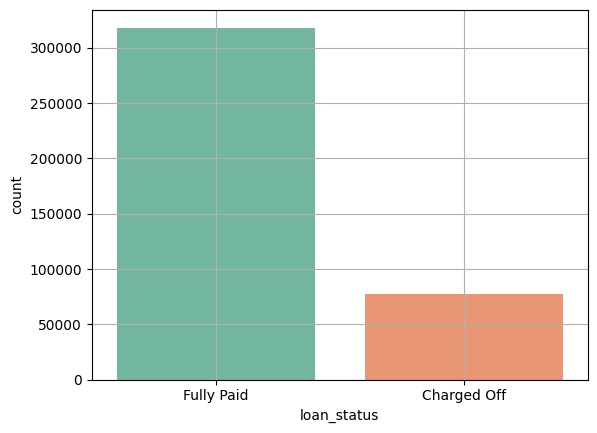

In [13]:
sns.set_palette('Set2')
sns.countplot(x = loan_df['loan_status'])
plt.grid()

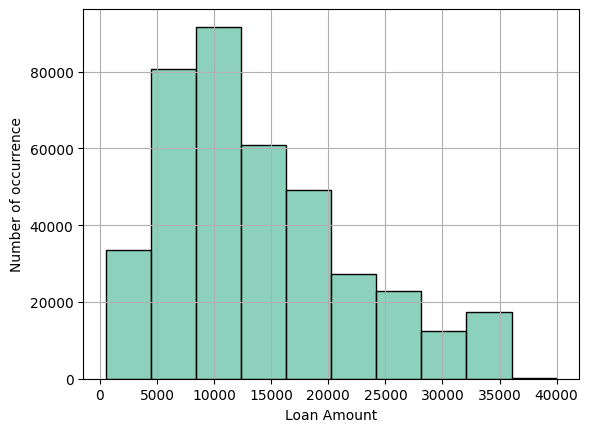

In [14]:
sns.histplot(loan_df['loan_amnt'], bins=10)
plt.xlabel('Loan Amount')
plt.ylabel('Number of occurrence')
plt.grid()

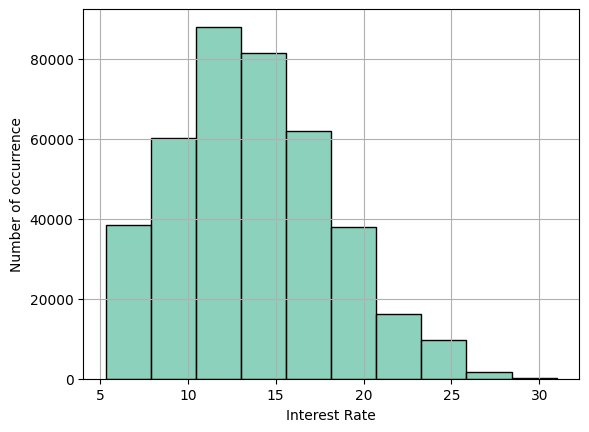

In [15]:
sns.histplot(loan_df['int_rate'], bins=10)
plt.xlabel('Interest Rate')
plt.ylabel('Number of occurrence')
plt.grid()

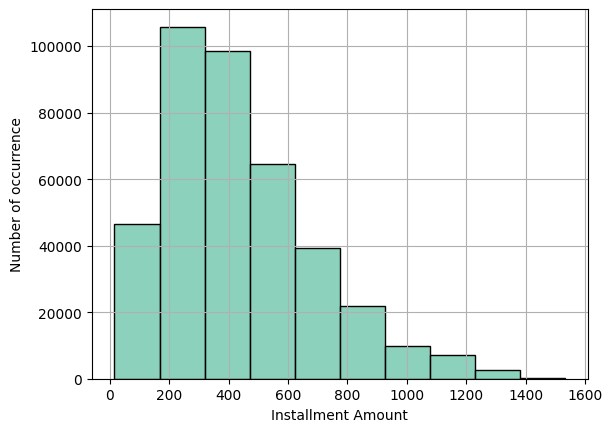

In [16]:
sns.histplot(loan_df['installment'], bins=10)
plt.xlabel('Installment Amount')
plt.ylabel('Number of occurrence')
plt.grid()

Text(0.5, 0, '\nTotal Accounts')

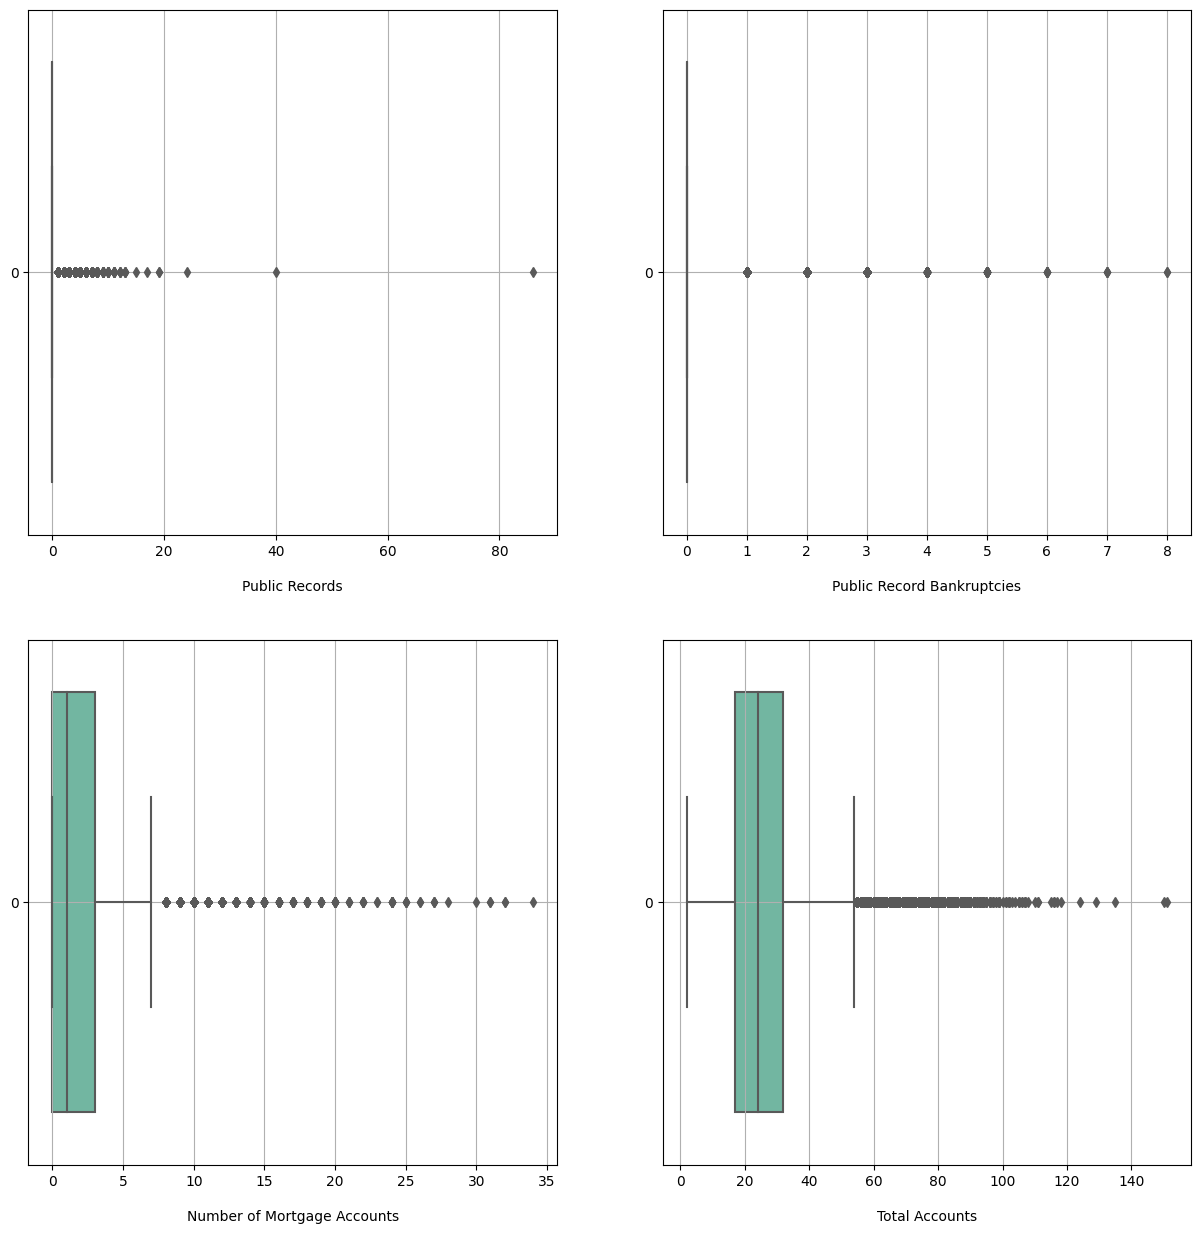

In [17]:
fig = plt.figure(figsize=(15,15))
grid = fig.add_gridspec(2,2)

ax0 = fig.add_subplot(grid[0,0])
sns.boxplot(loan_df['pub_rec'], orient='h', ax=ax0)
plt.grid()
ax0.set_xlabel('\nPublic Records')

ax1 = fig.add_subplot(grid[0,1])
sns.boxplot(loan_df['pub_rec_bankruptcies'], orient='h', ax=ax1)
plt.grid()
ax1.set_xlabel('\nPublic Record Bankruptcies')

ax2 = fig.add_subplot(grid[1,0])
sns.boxplot(loan_df['mort_acc'], orient='h', ax=ax2)
plt.grid()
ax2.set_xlabel('\nNumber of Mortgage Accounts')

ax3 = fig.add_subplot(grid[1,1])
sns.boxplot(loan_df['total_acc'], orient='h', ax=ax3)
plt.grid()
ax3.set_xlabel('\nTotal Accounts')


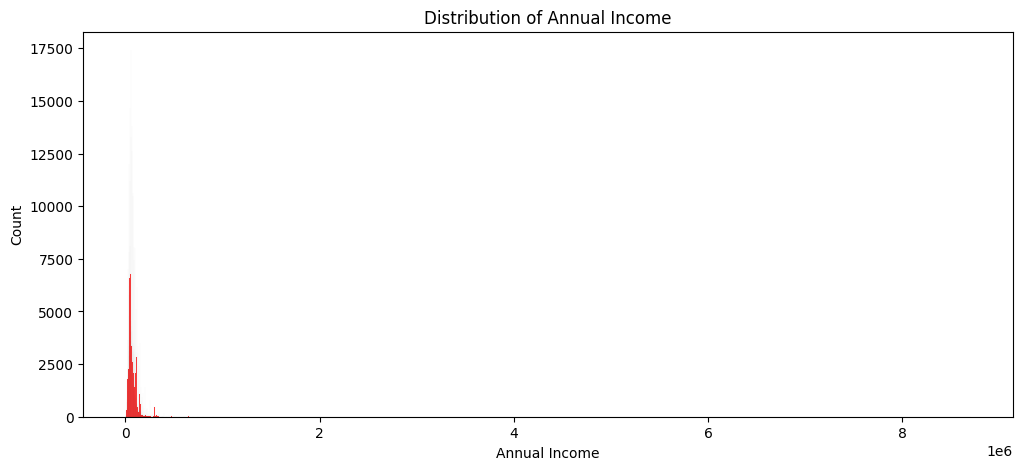

In [20]:
plt.figure(figsize=(12, 5))
sns.histplot(loan_df['annual_inc'], color= 'red')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income')

plt.show()

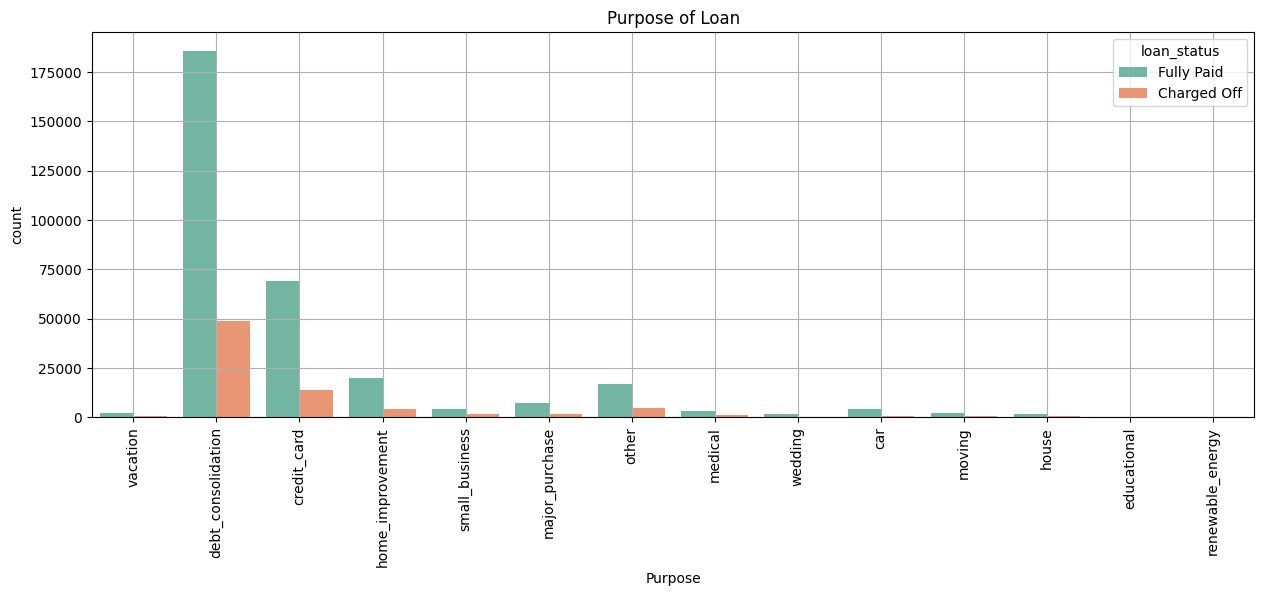

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x = loan_df.purpose, hue=loan_df.loan_status)
plt.xlabel('Purpose')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.title('Purpose of Loan')
plt.grid()

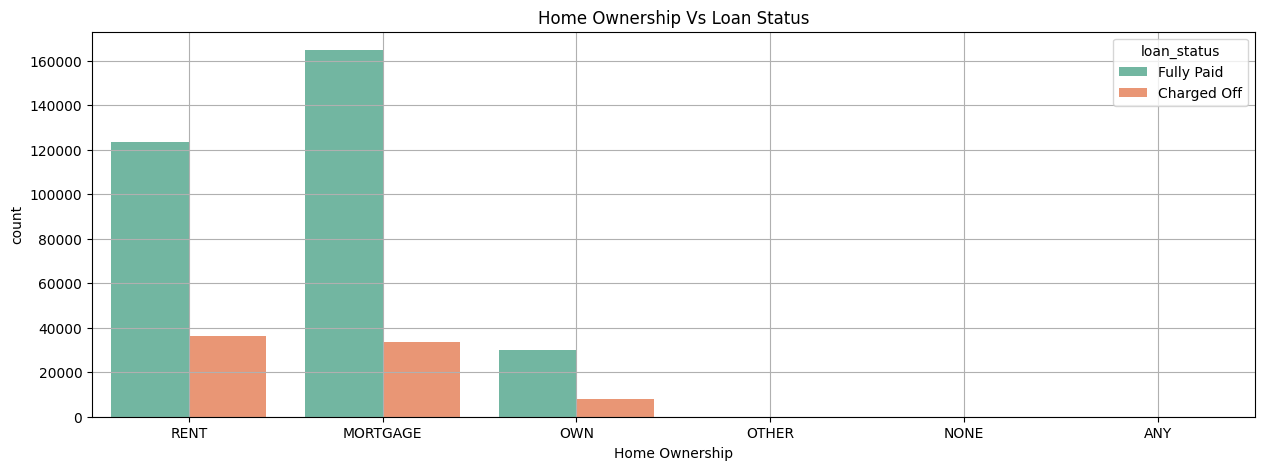

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x = loan_df.home_ownership, hue=loan_df.loan_status)
plt.xlabel('Home Ownership')
plt.ylabel('count')
plt.title('Home Ownership Vs Loan Status')
plt.grid()

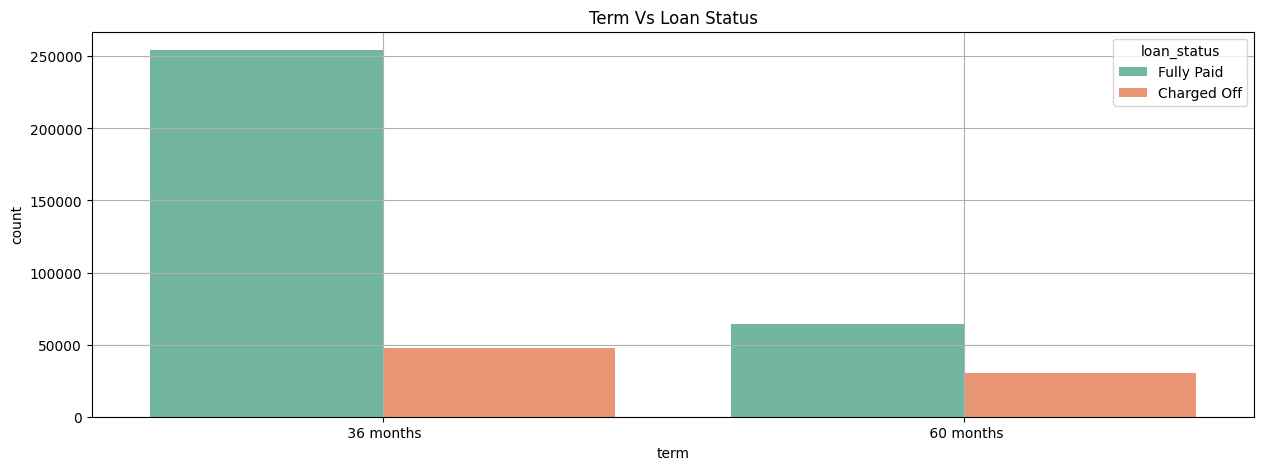

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x = loan_df.term, hue=loan_df.loan_status)
plt.xlabel('term')
plt.ylabel('count')
plt.title('Term Vs Loan Status')
plt.grid()

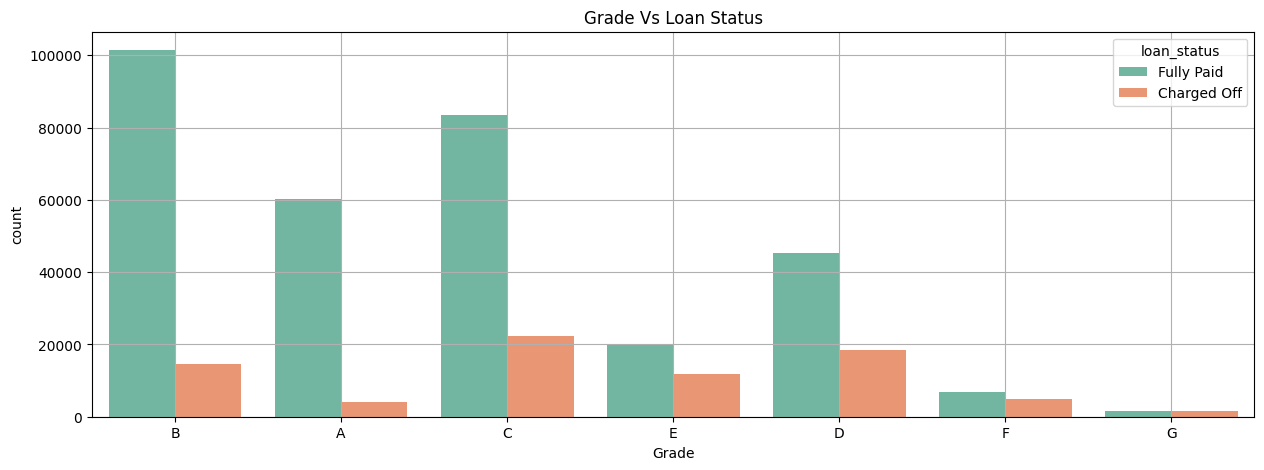

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x = loan_df.grade, hue=loan_df.loan_status)
plt.xlabel('Grade')
plt.ylabel('count')
plt.title('Grade Vs Loan Status')
plt.grid()

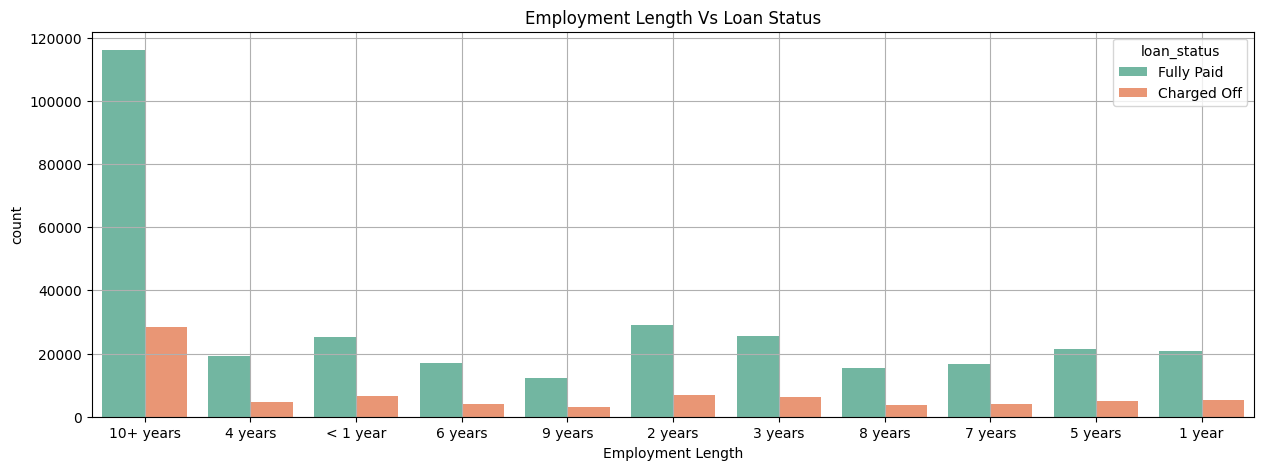

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x = loan_df.emp_length, hue=loan_df.loan_status)
plt.xlabel('Employment Length')
plt.ylabel('count')
plt.title('Employment Length Vs Loan Status')
plt.grid()

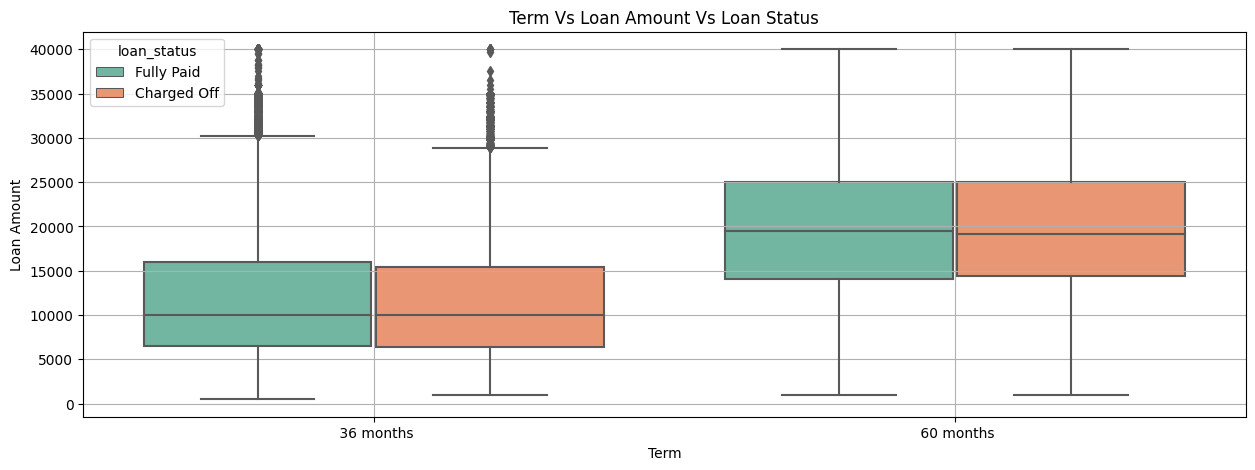

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(x = loan_df.term, y = loan_df.loan_amnt, hue=loan_df.loan_status)
plt.xlabel('Term')
plt.ylabel('Loan Amount')
plt.title('Term Vs Loan Amount Vs Loan Status')
plt.grid()

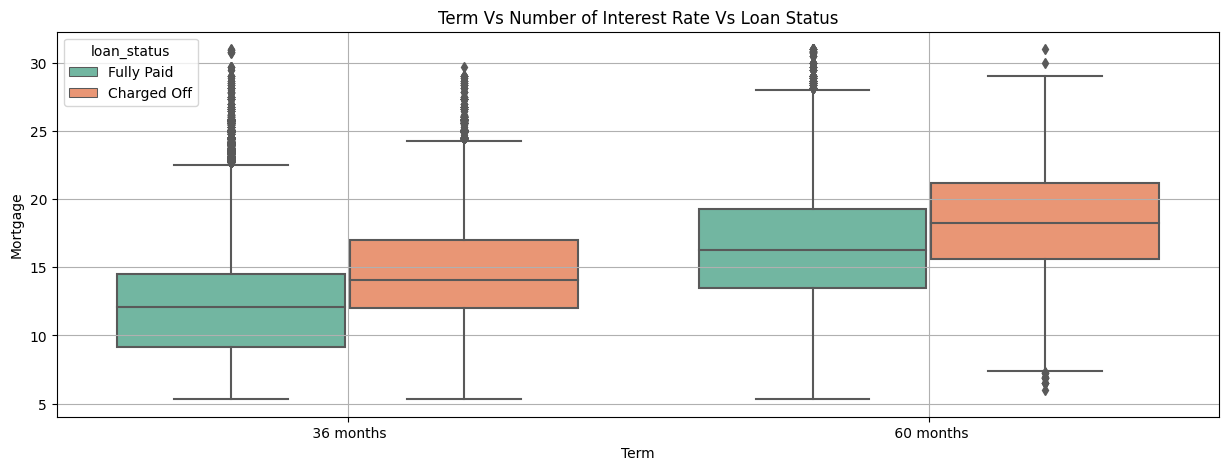

In [25]:
plt.figure(figsize=(15, 5))
sns.boxplot(x = loan_df.term, y = loan_df.int_rate, hue=loan_df.loan_status)
plt.xlabel('Term')
plt.ylabel('Mortgage')
plt.title('Term Vs Number of Interest Rate Vs Loan Status')
plt.grid()

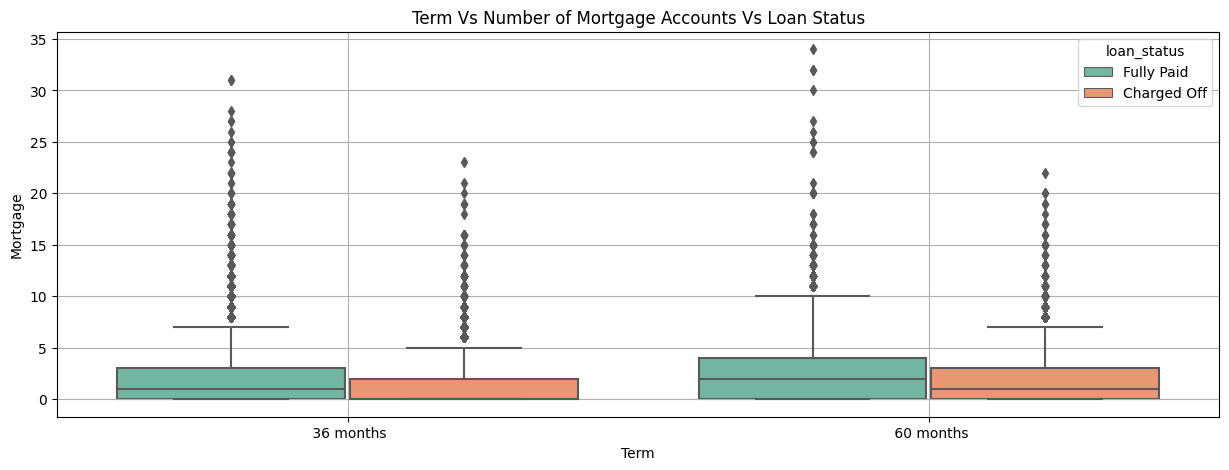

In [24]:
plt.figure(figsize=(15, 5))
sns.boxplot(x = loan_df.term, y = loan_df.mort_acc, hue=loan_df.loan_status)
plt.xlabel('Term')
plt.ylabel('Mortgage')
plt.title('Term Vs Number of Mortgage Accounts Vs Loan Status')
plt.grid()

In [ ]:
loan_df['available_balance'] = loan_df['revol_bal'] - loan_df['revol_util']

In [ ]:
loan_df.skew()

loan_amnt                 0.777285
int_rate                  0.420669
installment               0.983598
annual_inc               41.042725
dti                     431.051225
open_acc                  1.213019
pub_rec                  16.576564
revol_bal                11.727515
revol_util               -0.071889
total_acc                 0.864328
mort_acc                  1.755865
pub_rec_bankruptcies      3.426277
available_balance        11.736234
dtype: float64

In [ ]:
skewed_variables = ['annual_inc', 'dti', 'open_acc','pub_rec', 'revol_bal','mort_acc', 'pub_rec_bankruptcies','available_balance'] 

for variable in skewed_variables:
    lower_limit = np.percentile(loan_df[variable], 10)
    upper_limit = np.percentile(loan_df[variable], 90)
    loan_df[variable] = np.where(loan_df[variable] < lower_limit, lower_limit, loan_df[variable])
    loan_df[variable] = np.where(loan_df[variable] > upper_limit, upper_limit, loan_df[variable])

In [ ]:
loan_df.skew()

loan_amnt               0.777285
int_rate                0.420669
installment             0.983598
annual_inc              0.515637
dti                     0.117914
open_acc                0.403977
pub_rec                 2.006860
revol_bal               0.707409
revol_util             -0.071889
total_acc               0.864328
mort_acc                0.817964
pub_rec_bankruptcies    2.430400
available_balance       0.708290
dtype: float64

In [ ]:
encodable_variables = ['loan_status', 'initial_list_status', 'term', 'home_ownership', 'verification_status', 'purpose', 'application_type']
loan_df = pd.get_dummies(loan_df, columns=encodable_variables, drop_first=True)

In [ ]:
grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
loan_df['grade'] = loan_df['grade'].map(grade_mapping)

In [ ]:
emp_length_mapping = {'< 1 year': 1, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4,
                        '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9,
                        '10+ years': 10}

loan_df['emp_length'] = loan_df['emp_length'].replace(emp_length_mapping)


In [ ]:
import xgboost as xgb

drop_var = ['loan_status_Fully Paid', 'sub_grade', 'emp_title', 'issue_d', 'title', 'earliest_cr_line', 'address']

X = loan_df.drop(drop_var, axis=1)
y = loan_df['loan_status_Fully Paid']

xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X, y)

importance_scores = xgb_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_10_features = feature_importance_df.head(10)

[10:20:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


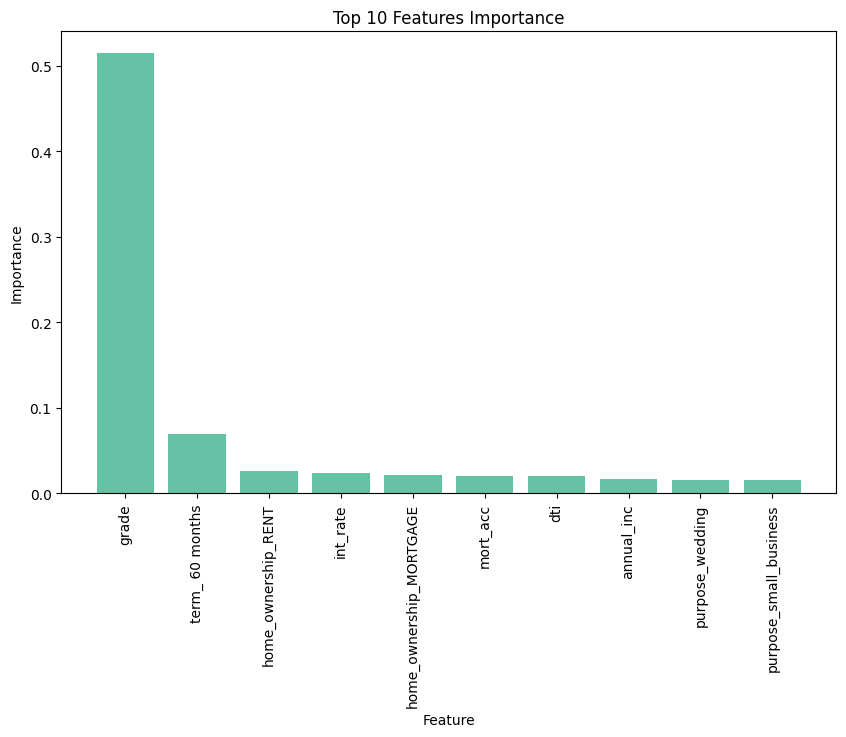

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_features['Feature'], top_10_features['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Features Importance')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler


numerical_variables = loan_df.select_dtypes(include=['float64', 'uint8'])
scaler = MinMaxScaler()
numerical_variables = pd.DataFrame(scaler.fit_transform(numerical_variables), columns=numerical_variables.columns)

vif = pd.DataFrame()
vif["Variable"] = numerical_variables.columns
vif["VIF"] = [variance_inflation_factor(numerical_variables.values, i) for i in range(numerical_variables.shape[1])]
print(vif.round(2))


                               Variable         VIF
0                             loan_amnt      217.65
1                              int_rate       10.93
2                           installment      193.24
3                            annual_inc        4.81
4                                   dti        4.54
5                              open_acc        5.69
6                               pub_rec        4.82
7                             revol_bal  2289982.76
8                            revol_util       31.01
9                             total_acc       10.37
10                             mort_acc        3.12
11                 pub_rec_bankruptcies        4.62
12                    available_balance  2285209.98
13               loan_status_Fully Paid        5.57
14                initial_list_status_w        1.75
15                      term_ 60 months        8.76
16              home_ownership_MORTGAGE      746.61
17                  home_ownership_NONE        1.12
18          

In [ ]:
vif = vif.drop(vif[vif['VIF'] > 4.6].index)

In [ ]:
select_var = vif['Variable'].tolist()
itr2 = loan_df[select_var]
vif = pd.DataFrame()
vif["Variable"] = itr2.columns
vif["VIF"] = [variance_inflation_factor(itr2.values, i) for i in range(itr2.shape[1])]
print(vif.round(2))

                               Variable   VIF
0                                   dti  3.21
1                              mort_acc  1.78
2                 initial_list_status_w  1.63
3                   home_ownership_NONE  1.00
4                  home_ownership_OTHER  1.00
5   verification_status_Source Verified  1.82
6          verification_status_Verified  1.99
7                   purpose_educational  1.00
8                         purpose_house  1.00
9                purpose_major_purchase  1.02
10                      purpose_medical  1.01
11                       purpose_moving  1.01
12             purpose_renewable_energy  1.00
13               purpose_small_business  1.02
14                     purpose_vacation  1.01
15                      purpose_wedding  1.00
16               application_type_JOINT  1.00


In [ ]:
X = loan_df[['dti','mort_acc', 'term_ 60 months', 'home_ownership_RENT', 'purpose_wedding', 'verification_status_Source Verified', 'purpose_small_business', 'application_type_JOINT']]
Y = loan_df['loan_status_Fully Paid']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
Y_pred_log = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

lr_accuracy = (accuracy_score(y_test, Y_pred_log)*100).round(2)
lr_precision = (precision_score(y_test, Y_pred_log)*100).round(2)
lr_recall = (recall_score(y_test, Y_pred_log)*100).round(2)
lr_f1 = (f1_score(y_test, Y_pred_log)*100).round(2)

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, cmap='coolwarm',annot=True,fmt = " ", ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['Fully Paid','Charged Off']);

In [ ]:
confusion_matrix(y_test, Y_pred_log)

array([[ 3042, 20232],
       [11882, 83653]], dtype=int64)

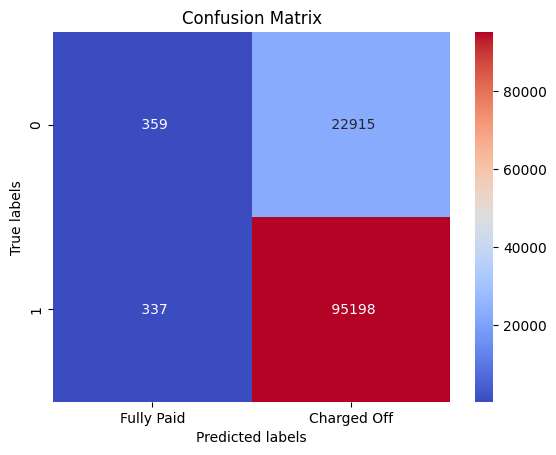

In [ ]:
plot_confusion_matrix(y_test, Y_pred_log)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10]
}

log_reg_cv = GridSearchCV(log_reg, param_grid, cv = 5)
log_reg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']})

In [ ]:
best_model = log_reg_cv.best_estimator_
Y_pred_logcv = best_model.predict(X_test)
print("Best Hyperparameters: ", log_reg_cv.best_params_)

Best Hyperparameters:  {'C': 0.1, 'penalty': 'l2'}


In [ ]:
lrcv_accuracy = (accuracy_score(y_test, Y_pred_logcv)*100).round(2)
lrcv_precision = (precision_score(y_test, Y_pred_logcv)*100).round(2)
lrcv_recall = (recall_score(y_test, Y_pred_logcv)*100).round(2)
lrcv_f1 = (f1_score(y_test, Y_pred_logcv)*100).round(2)

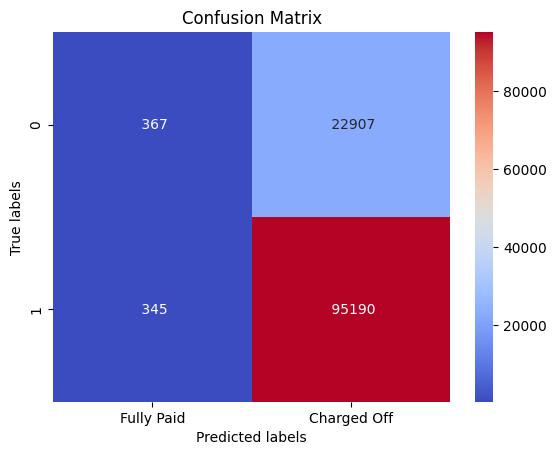

In [ ]:
plot_confusion_matrix(y_test, Y_pred_logcv)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
Y_pred_dtc = dtc.predict(X_test)

In [ ]:
dtc_accuracy = (accuracy_score(y_test, Y_pred_dtc)*100).round(2)
dtc_precision = (precision_score(y_test, Y_pred_dtc)*100).round(2)
dtc_recall = (recall_score(y_test, Y_pred_dtc)*100).round(2)
dtc_f1 = (f1_score(y_test, Y_pred_dtc)*100).round(2)


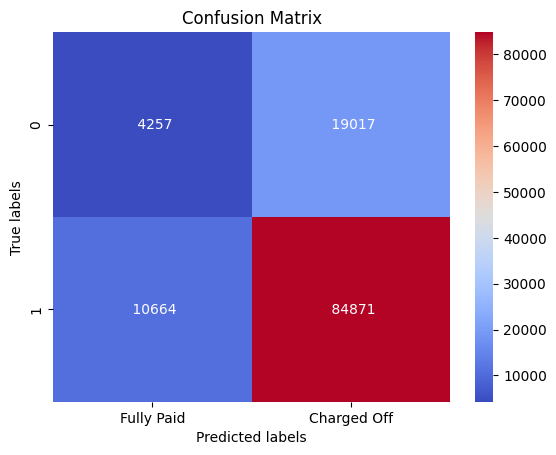

In [ ]:
plot_confusion_matrix(y_test, Y_pred_dtc)

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtc_cv = GridSearchCV(dtc, param_grid, cv = 5)
dtc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
best_model = dtc_cv.best_estimator_
Y_pred_dtccv = best_model.predict(X_test)

In [ ]:
dtc_cv_accuracy = (accuracy_score(y_test, Y_pred_dtccv)*100).round(2)
dtc_cv_precision = (precision_score(y_test, Y_pred_dtccv)*100).round(2)
dtc_cv_recall = (recall_score(y_test, Y_pred_dtccv)*100).round(2)
dtc_cv_f1 = (f1_score(y_test, Y_pred_dtccv)*100).round(2)

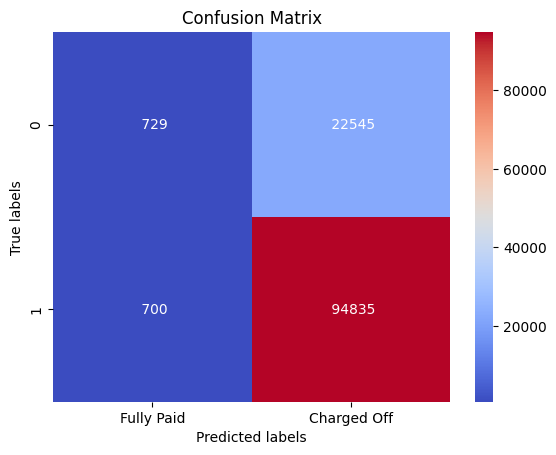

In [ ]:
plot_confusion_matrix(y_test, Y_pred_dtccv)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

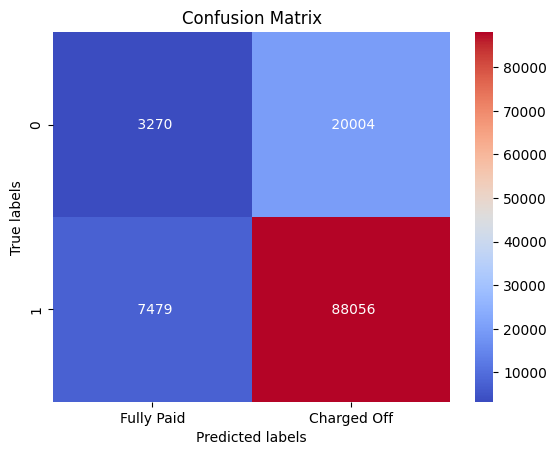

In [ ]:
Y_pred_rfc = rfc.predict(X_test)
plot_confusion_matrix(y_test, Y_pred_rfc)

In [ ]:
rfc_accuracy = (accuracy_score(y_test, Y_pred_rfc)*100).round(2)
rfc_precision = (precision_score(y_test, Y_pred_rfc)*100).round(2)
rfc_recall = (recall_score(y_test, Y_pred_rfc)*100).round(2)
rfc_f1 = (f1_score(y_test, Y_pred_rfc)*100).round(2)

In [ ]:
xgb_classifier.fit(X_train, y_train)

[11:20:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

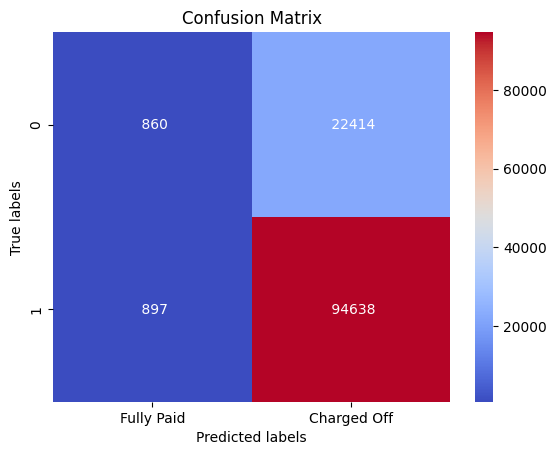

In [ ]:
Y_pred_xgb = xgb_classifier.predict(X_test)
plot_confusion_matrix(y_test, Y_pred_xgb)

In [ ]:
xgb_accuracy = (accuracy_score(y_test, Y_pred_xgb)*100).round(2)
xgb_precision = (precision_score(y_test, Y_pred_xgb)*100).round(2)
xgb_recall = (recall_score(y_test, Y_pred_xgb)*100).round(2)
xgb_f1 = (f1_score(y_test, Y_pred_xgb)*100).round(2)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

ExtraTreesClassifier()

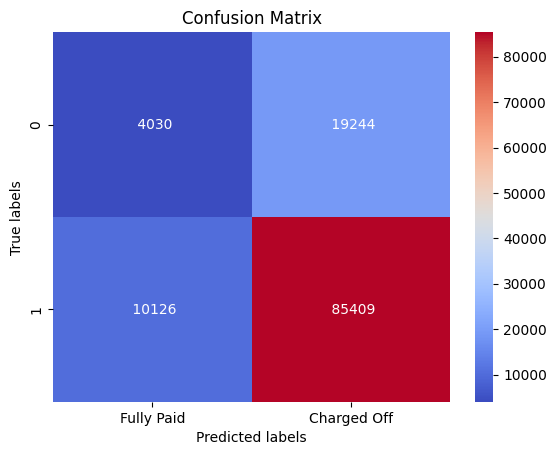

In [ ]:
Y_pred_etc = etc.predict(X_test)
plot_confusion_matrix(y_test, Y_pred_etc)

In [ ]:
etc_accuracy = (accuracy_score(y_test, Y_pred_etc)*100).round(2)
etc_precision = (precision_score(y_test, Y_pred_etc)*100).round(2)
etc_recall = (recall_score(y_test, Y_pred_etc)*100).round(2)
etc_f1 = (f1_score(y_test, Y_pred_etc)*100).round(2)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

etc_cv = GridSearchCV(etc, param_grid, cv = 5)
etc_cv.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
Y_pred_etc_cv = etc_cv.predict(X_test)

In [ ]:
etc_cv_accuracy = (accuracy_score(y_test, Y_pred_etc_cv)*100).round(2)
etc_cv_precision = (precision_score(y_test, Y_pred_etc_cv)*100).round(2)
etc_cv_recall = (recall_score(y_test, Y_pred_etc_cv)*100).round(2)
etc_cv_f1 = (f1_score(y_test, Y_pred_etc_cv)*100).round(2)


In [ ]:
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'LR': [lr_accuracy, lr_precision, lr_recall, lr_f1],
    'LRCV': [lrcv_accuracy, lrcv_precision, lrcv_recall, lrcv_f1],
    'DTC': [dtc_accuracy, dtc_precision, dtc_recall, dtc_f1],
    'DTC_CV': [dtc_cv_accuracy, dtc_cv_precision, dtc_cv_recall, dtc_cv_f1],
    'RFC': [rfc_accuracy, rfc_precision, rfc_recall, rfc_f1],
    'XGB': [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1],
    'ETC': [etc_accuracy, etc_precision, etc_recall, etc_f1],
    'ETC_CV': [etc_cv_accuracy, etc_cv_precision, etc_cv_recall, etc_cv_f1]
}

metrics_df = pd.DataFrame(data)
metrics_df.set_index('Metric', inplace=True)


In [ ]:
metrics_df

,LR,LRCV,DTC,DTC_CV,RFC,XGB,ETC,ETC_CV
Metric,,,,,,,,
Accuracy,80.43,80.43,75.03,80.43,76.87,80.38,75.28,80.44
Precision,80.60,80.60,81.70,80.79,81.49,80.85,81.61,80.71
Recall,99.65,99.64,88.85,99.27,92.17,99.06,89.40,99.44
F1,89.12,89.12,85.13,89.08,86.50,89.03,85.33,89.10


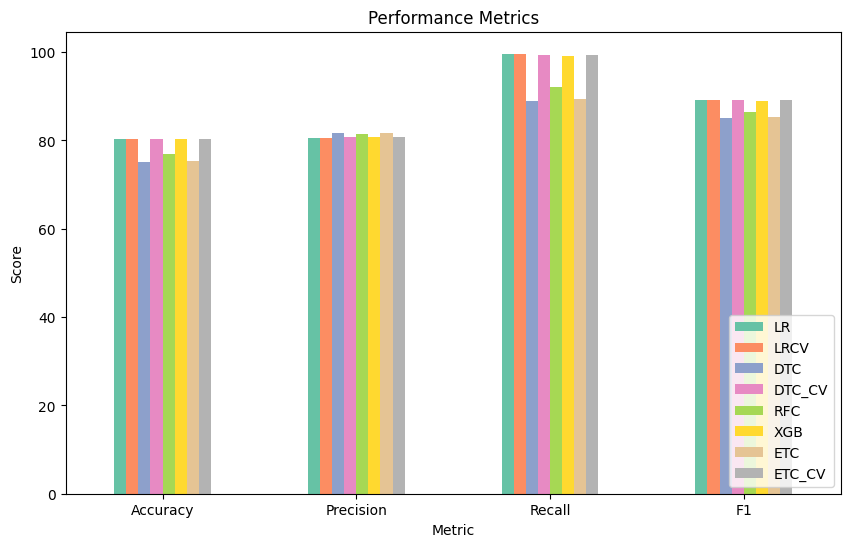

In [ ]:
metrics_df.plot.bar(rot=0, figsize=(10, 6))
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.legend(loc='lower right')
plt.show()